# Install image-background-remove-tool

In [1]:
#@title Choose branch
branch = 'master'  #@param {type: "string"}
!git clone https://github.com/OPHoperHPO/image-background-remove-tool.git -b $branch
%cd /content/image-background-remove-tool
!pip install -r requirements.txt
!python setup.py --model all

Cloning into 'image-background-remove-tool'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 1385 (delta 11), reused 37 (delta 7), pack-reused 1333
Receiving objects: 100% (1385/1385), 100.90 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (455/455), done.
/content/image-background-remove-tool
     |████████████████████████████████| 76.6MB 44kB/s 
     |████████████████████████████████| 14.5MB 235kB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 34.2MB 156kB/s 
     |████████████████████████████████| 757kB 50.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.4MB 248kB/s 
     |████████████████████████████████| 2.2MB 49.7MB/s 
     |████████████████████████████████| 68.7MB 129kB/s 
     |██████████████████████████

Create u2net dir
Download u2net checkpoint file
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/u2net.pth
To: /content/image-background-remove-tool/models/u2net/u2net.pth
100% 176M/176M [00:05<00:00, 32.6MB/s]
Create basnet dir
Download basnet checkpoint file
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/basnet.pth
To: /content/image-background-remove-tool/models/basnet/basnet.pth
100% 348M/348M [00:10<00:00, 34.4MB/s]
Create u2netp dir
Download u2netp checkpoint file
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/u2netp.pth
To: /content/image-background-remove-tool/models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 6.85MB/s]
Create fba_matting dir
Download fba_matting checkpoint file
Downloading...
From: https://github.com/OPHoperHPO/image-background-remove-tool/releases/download/3.2/fba_matting.pth
To: /content/image

# Try

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth
100% 170M/170M [00:00<00:00, 260MB/s]
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100% 233M/233M [00:03<00:00, 76.5MB/s]
/content/image-background-remove-tool/libs/fba/models.py:286: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  F = ((alpha * img + (1 - alpha**2) * F - alpha * (1 - alpha) * B))


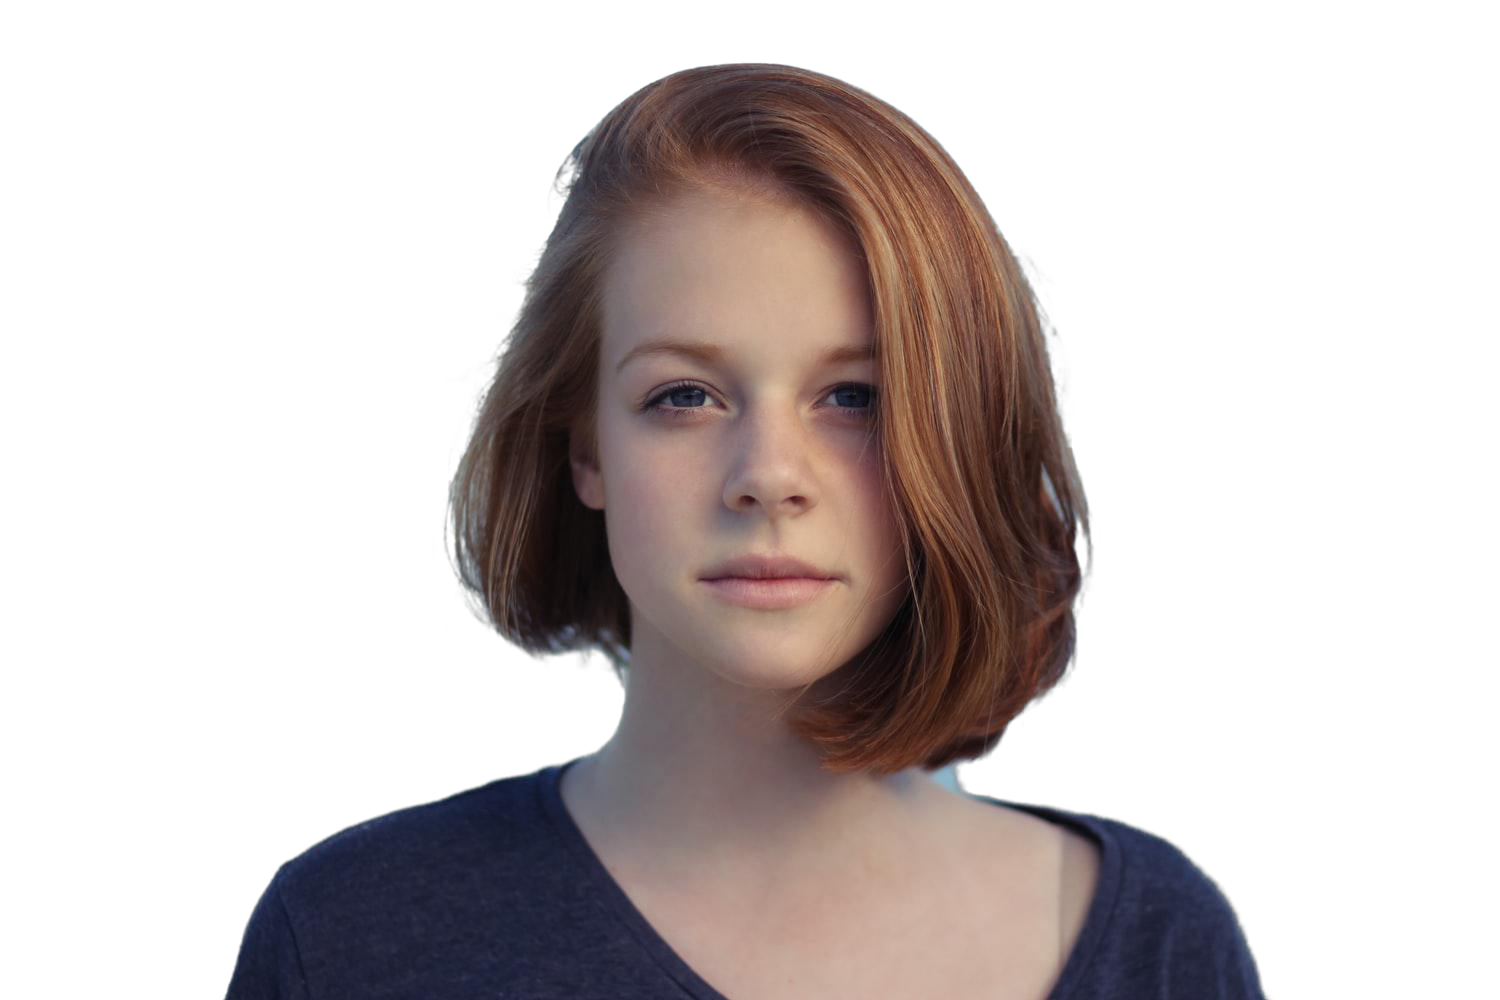

In [2]:
#@title ## Download file from URL
#@markdown ### Enter your URL
url = "https://images.unsplash.com/photo-1438761681033-6461ffad8d80?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1500&q=80" #@param {type:"string"}
#@markdown ### Choose a model and algorithms to improve the result
preprocessing = "None" #@param ["None", "bbd-fastrcnn", "bbmd-maskrcnn"] {allow-input: false}
model_name = "deeplabv3" #@param ["u2net", "basnet", "u2netp", "deeplabv3"] {allow-input: false}
postprocessing = "fba" #@param ["fba", "rtb-bnb", "rtb-bnb2", "No"] {allow-input: false}
#@markdown ### Other settings
display_output = True #@param {type:"boolean"}
download_output = False #@param {type:"boolean"}
enable_verbose = True #@param {type:"boolean"}
from IPython.display import display
from PIL import Image
import os
from google.colab import files
import requests

if url:
  resp = requests.get(url, stream=True)
  if resp.status_code == 200:
    try:
      Image.open(resp.raw).save("./1.jpg")
    except BaseException:
      raise Exception("Failed to open the image from the link")
    fn = "1.jpg"
    if os.path.exists("./{}".format(fn)):
      out = fn+'.png'
      if not enable_verbose:
        !python main.py -i ./$fn -o ./$out -m $model_name -pre $preprocessing -post $postprocessing >&- 2>&-
      else:
        !python main.py -i ./$fn -o ./$out -m $model_name -pre $preprocessing -post $postprocessing
      if os.path.exists(fn+".png"):
        if display_output:
          display(Image.open(fn+".png"))
        if download_output:
          files.download(fn+'.png')
  else:
    raise Exception("Failed to download the image from the link")
else:
  raise Exception("Empty url!")






Saving 1.jpg (2).png to 1.jpg (2).png
/content/image-background-remove-tool/libs/fba/models.py:286: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  F = ((alpha * img + (1 - alpha**2) * F - alpha * (1 - alpha) * B))


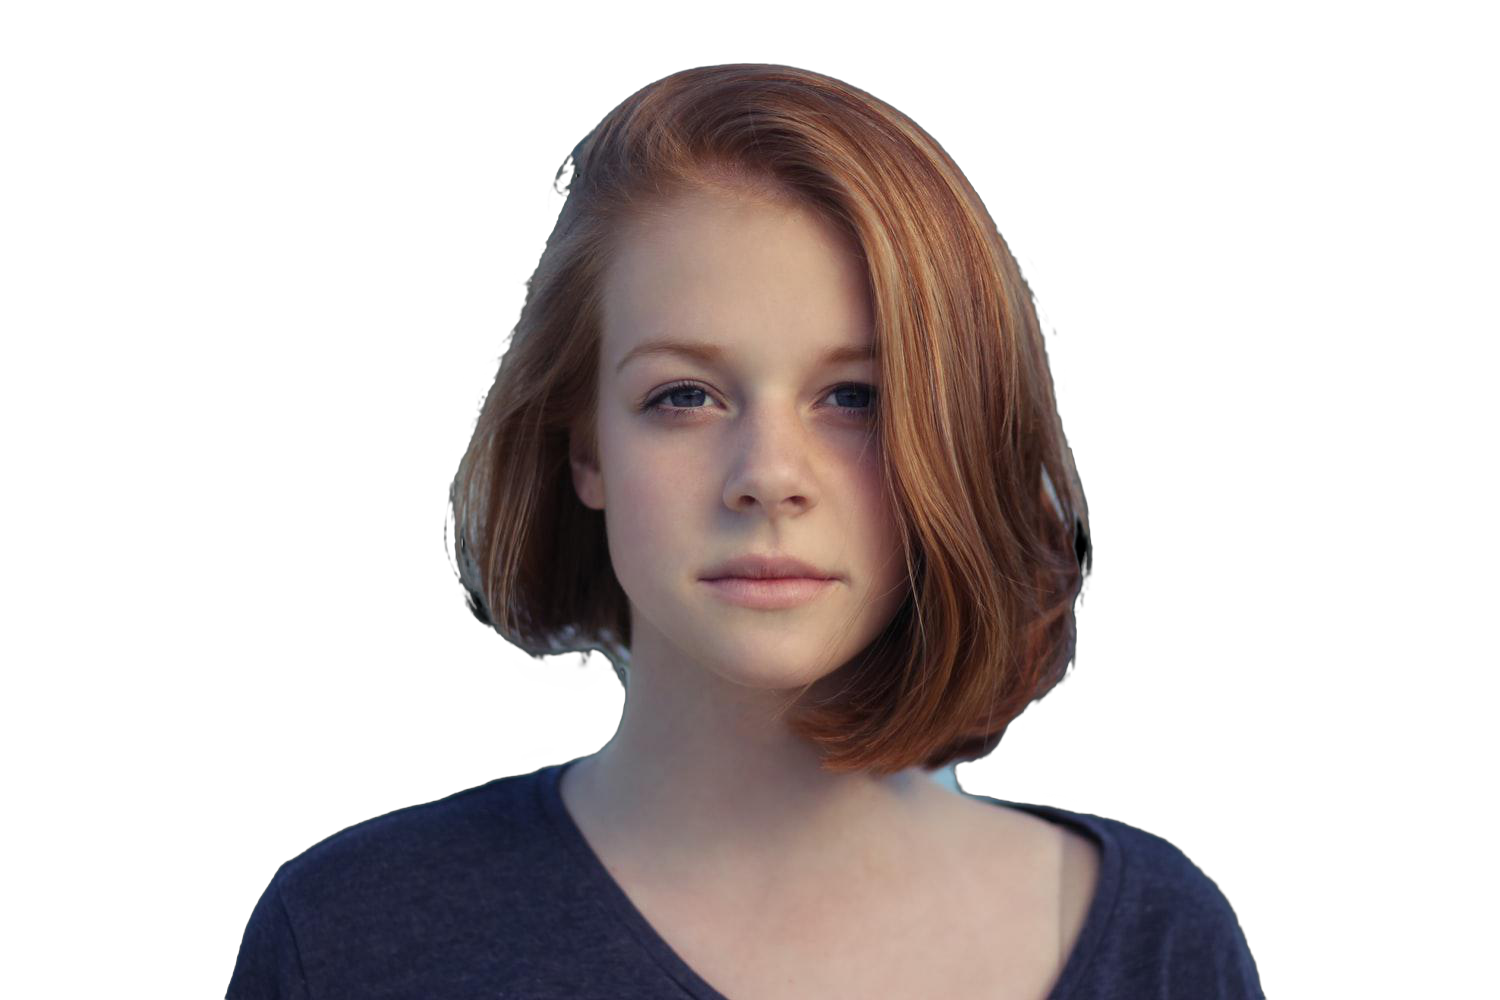

In [3]:
#@title ## Upload files from local file system
#@markdown > Run the cell so that the file selection button appears
#@markdown ### Choose a model and algorithms to improve the result
preprocessing = "None" #@param ["None", "bbd-fastrcnn", "bbmd-maskrcnn"] {allow-input: false}
model_name = "u2net" #@param ["u2net", "basnet", "u2netp", "deeplabv3"] {allow-input: false}
postprocessing = "fba" #@param ["fba", "rtb-bnb", "rtb-bnb2", "No"] {allow-input: false}
#@markdown ### Other settings
display_output = True #@param {type:"boolean"}
download_output = False #@param {type:"boolean"}
enable_verbose = True #@param {type:"boolean"}
from IPython.display import display
from PIL import Image
import os
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  if os.path.exists("./{}".format(fn)):
    out = fn+'.png'
    if not enable_verbose:
      !python main.py -i './$fn' -o './$out' -m $model_name -pre $preprocessing -post $postprocessing >&- 2>&-
    else:
      !python main.py -i './$fn' -o './$out' -m $model_name -pre $preprocessing -post $postprocessing
    if os.path.exists(fn+".png"):
      if display_output:
        display(Image.open(fn+".png"))
      if download_output:
        files.download(fn+'.png')
  else:
    raise Exception("Unable to process uploaded file: {}".format(fn))





